# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
### Python at Work

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M0W0_Python_FindNeighbours" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/X1X2.csv")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/X1X2L.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [9]:
ls


BLR_M0W0_Python_BasicOperations.ipynb  sample_data/
BLR_M0W0_Python_Data-Munging.ipynb     Week0-full_gender_height_weight.csv
BLR_M0W0_Python_Dictionaries.ipynb     Week0-part_gender_height_weight.csv
BLR_M0W0_Python_FindNeighbours.ipynb   X1X2.csv
BLR_M0W0_Python_Lines.ipynb            X1X2L.csv


In [0]:
import numpy as np 
import pandas as pd
import math

In [0]:
data = pd.read_csv('X1X2.csv')

In [12]:
data

,X1,X2
0,2.5,3.5
1,4.0,5.0
2,2.1,3.1
3,3.8,4.8
4,2.6,3.6
5,3.9,4.9
6,2.3,3.3
7,4.1,5.1
8,2.1,3.1
9,3.7,4.7


In [0]:
def dist(a, b):
    sqSum = 0
    for i in range(len(a)):
        sqSum += (a[i] - b[i]) ** 2
    return math.sqrt(sqSum)

In [0]:
def find_distance(point1, data_array):
    distance = []
    for point2 in data_array:
        distance.append(dist(point1, point2))
    return np.array(distance)

In [0]:
def nearest_points(distances, k):
    return np.argsort(distances)[:k]

In [0]:
k = 1
for point1 in data.values:
    distances = find_distance(point1, data.values)
    print("{} Nearest points for the point X1 : {} X2 : {} are \n".format(k, point1[0], point1[1]))
    print(data.loc[nearest_points(distances,k)])
    print('\n')

2 Nearest points for the point X1 : 2.5 X2 : 3.5 are 

nearest_points(distances,k)-  [0 4]
    X1   X2
0  2.5  3.5
4  2.6  3.6


2 Nearest points for the point X1 : 4.0 X2 : 5.0 are 

nearest_points(distances,k)-  [1 7]
    X1   X2
1  4.0  5.0
7  4.1  5.1


2 Nearest points for the point X1 : 2.1 X2 : 3.1 are 

nearest_points(distances,k)-  [2 8]
    X1   X2
2  2.1  3.1
8  2.1  3.1


2 Nearest points for the point X1 : 3.8 X2 : 4.8 are 

nearest_points(distances,k)-  [3 9]
    X1   X2
3  3.8  4.8
9  3.7  4.7


2 Nearest points for the point X1 : 2.6 X2 : 3.6 are 

nearest_points(distances,k)-  [4 0]
    X1   X2
4  2.6  3.6
0  2.5  3.5


2 Nearest points for the point X1 : 3.9 X2 : 4.9 are 

nearest_points(distances,k)-  [5 1]
    X1   X2
5  3.9  4.9
1  4.0  5.0


2 Nearest points for the point X1 : 2.3 X2 : 3.3 are 

nearest_points(distances,k)-  [6 2]
    X1   X2
6  2.3  3.3
2  2.1  3.1


2 Nearest points for the point X1 : 4.1 X2 : 5.1 are 

nearest_points(distances,k)-  [7 1]
    X1

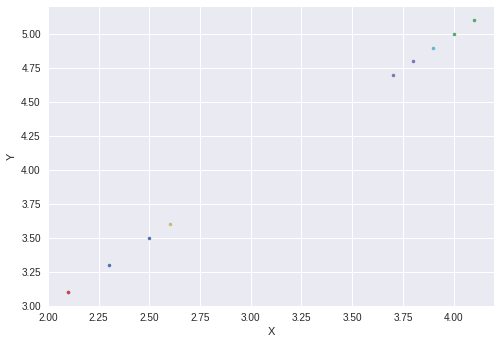

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('X1X2.csv')

k = 2
for point1 in data.values:
    distances = find_distance(point1, data.values)
    print("{} Nearest points for the point X1 : {} X2 : {} are \n".format(k, point1[0], point1[1]))
    print("nearest_points(distances,k)- ", nearest_points(distances,k))
    print(data.loc[nearest_points(distances,k)])
    print('\n')
    plt.plot(point1[0], point1[1], '.')
    plt.xlabel("X")
    plt.ylabel("Y")
plt.show()

In [37]:
print(data.loc[[0, 4, 5]])


    X1   X2
0  2.5  3.5
4  2.6  3.6
5  3.9  4.9


#### Practice: 
 * Confirm by printing distances along with X1 and X2
 * Plot the points and visually verify

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [49]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 361
Date of submission:  07 Mar 2019
Time of submission:  00:18:48
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
